<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#До-преобразования." data-toc-modified-id="До-преобразования.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>До преобразования.</a></span></li><li><span><a href="#После-преобразования." data-toc-modified-id="После-преобразования.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>После преобразования.</a></span>

# Защита персональных данных клиентов

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Возраст


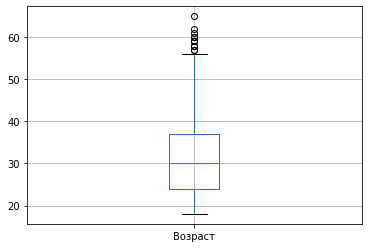

In [6]:
print('Возраст')
data.boxplot('Возраст')
limit = (data['Возраст'].quantile(.75) - data['Возраст'].quantile(.25))*1.5 + \
data['Возраст'].quantile(.75)


<div>
    <font color='green'>Удаление аномалий.</font>
    </div>

In [7]:
data = data.drop(data.loc[data['Возраст'] > limit].index, axis=0)

Зарплата


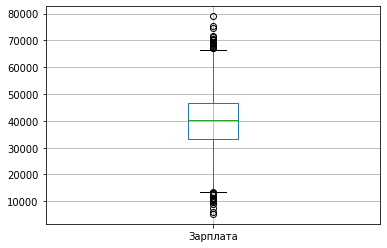

In [8]:
print('Зарплата')
data.boxplot('Зарплата')

limit_top = (data['Зарплата'].quantile(.75) - data['Зарплата'].quantile(.25))*1.5 + \
data['Зарплата'].quantile(.75)

limit_bottom = data['Зарплата'].quantile(.25) - \
(data['Зарплата'].quantile(.75) - data['Зарплата'].quantile(.25))*1.5


<div>
    <font color='green'>Удаление аномалий.</font>
    </div>

In [9]:
data = data.drop(data.loc[(data['Зарплата'] > limit_top) | \
                          (data['Зарплата'] < limit_bottom)].index, axis=0)

array([[<AxesSubplot:title={'center':'Пол'}>]], dtype=object)

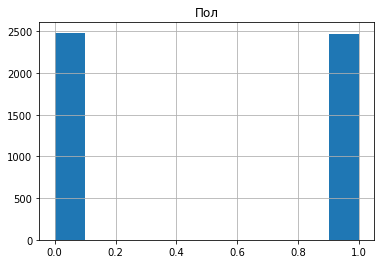

In [10]:
data.hist('Пол')

array([[<AxesSubplot:title={'center':'Члены семьи'}>]], dtype=object)

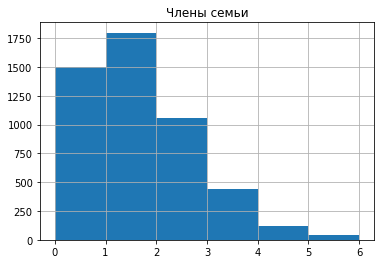

In [11]:
data.hist('Члены семьи', bins=6)

array([[<AxesSubplot:title={'center':'Страховые выплаты'}>]], dtype=object)

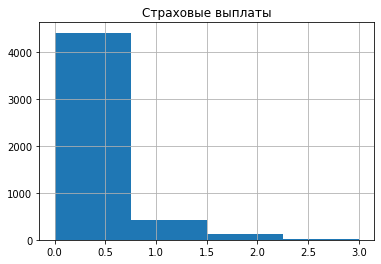

In [12]:
data.hist('Страховые выплаты', bins=4)

## Умножение матриц

**Ответ:** после умножения признаков на обратимую матрицу качество линейной регрессии не изменится.

**Обоснование:**
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y = (P^{-1} (X^T X)^{-1} (P^T)^{-1}) (P^T X^T) y = 
P^{-1} (X^T X)^{-1} ((P^T)^{-1}) P^T) X^T y = P^{-1}(X^T X)^{-1}X^Ty = P^{-1}w
$$\
\
То есть если X преобразовать, умножив на P, то вектор весов для минимума MSE преобразованных признаков w' будет равным, как показано выше, $P^{-1}w$. Тогда получается, что предсказание не меняется.

## Алгоритм преобразования

**Алгоритм**

Для защиты данных клиентов можно умножать матрицу данных на обратимую матрицу, причём на случайную, которую с помощью нехитрого способа можно часто менять. При этом предсказание модели машинного обучения не меняется и качество линейной регрессии не изменяется.

**Обоснование**

При умножении признаков на обратимую матрицу не меняется предсказание и качество линейной регрессии.

## Проверка алгоритма

<div>
    <font color='green'><b><h3>До преобразования.</h3></b></font>
    </div>

<div>
    <font color='green'>Признаки для обучения и целевой признак:</font>
    </div>

In [13]:
features4 = data.drop('Страховые выплаты', axis=1)
target4 = data['Страховые выплаты']

<div>
    <font color='green'>Предсказание целевого признака моделью линейной регрессии из sklearn. Метрика R2:</font>
    </div>

In [14]:
model = LinearRegression()
model.fit(features4, target4)
predictions4 = model.predict(features4)
r2_4 = r2_score(target4, predictions4)
print('R2:',r2_4)

R2: 0.41766486814214643


<div>
    <font color='green'><b><h3>После преобразования.</h3></b></font>
    </div>

<div>
    <font color='green'>Генерирование случайной обратимой матрицы:</font>
    </div>

In [15]:
P4 = np.random.randint (1, 100, (features4.shape[1], features4.shape[1]))
print('Обратимая матрица P4: \n', P4, '\n')
print('Обратная матрица матрице P4: \n', np.linalg.inv(P4))

Обратимая матрица P4: 
 [[50 56 62 52]
 [20 30 50 92]
 [94 96 13 47]
 [89 10 19 42]] 

Обратная матрица матрице P4: 
 [[ 1.32382615e-03 -6.16834406e-03 -9.20866146e-05  1.19756373e-02]
 [ 2.54040706e-03 -1.21301417e-03  1.06003366e-02 -1.23504687e-02]
 [ 2.51810685e-02 -8.27433899e-03 -1.21612696e-02  5.57221293e-04]
 [-1.48015452e-02  1.71029810e-02  3.17277297e-03  1.12108968e-03]]


<div>
    <font color='green'>Таблица с признаками, умноженная на случайную обратимую матрицу:</font>
    </div>

In [16]:
features4_p = pd.DataFrame(features4.values.dot(P4), columns=features4.columns)
print('Преобразованные данные:')
features4_p

Преобразованные данные:


,Пол,Возраст,Зарплата,Члены семьи
0,4663359.0,4762896.0,646931.0,2335066.0
1,3573009.0,3649390.0,496319.0,1790274.0
2,1974580.0,2016870.0,274450.0,989668.0
3,3920398.0,4003850.0,543188.0,1961916.0
4,2454010.0,2506496.0,340762.0,1229328.0
...,...,...,...,...
4946,3356538.0,3428060.0,465538.0,1680560.0
4947,4926369.0,5031430.0,682919.0,2465970.0
4948,3187178.0,3255020.0,441738.0,1595224.0
4949,3074557.0,3139946.0,426319.0,1539102.0


<div>
    <font color='green'>Предсказание моделью линейной регрессии из sklearn целевого признака на преобразованных данных. Метрика R2:</font>
    </div>

In [17]:
model_p = LinearRegression()
model_p.fit(features4_p, target4)
predictions4_p = model_p.predict(features4_p)
r2_4_p = r2_score(target4, predictions4_p)
print('R2:',r2_4_p)

R2: 0.4176648681421401


<div>
    <font color='green'>Сравнение метрики R2 до преобразования и после преобразования:</font>
    </div>

In [18]:
print('R2 до преобразования:', '  ', r2_4)
print('R2 после преобразования:', r2_4_p)

R2 до преобразования:    0.41766486814214643
R2 после преобразования: 0.4176648681421401


**Качество линейной регрессии из sklearn практически не изменилось после преобразования данных умножением на случайную обратимую матрицу.**